In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("ENB2012_data.csv")
df.rename(columns={
    "X1": "Relative Compactness",
    "X2": "Surface Area",
    "X3": "Wall Area",
    "X4": "Roof Area",
    "X5": "Overall Height",
    "X6": "Orientation",
    "X7": "Glazing Area",
    "X8": "Glazing Area Distribution",
    "Y1": "Heating Load",
    "Y2": "Cooling Load"
}, inplace=True)

In [3]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


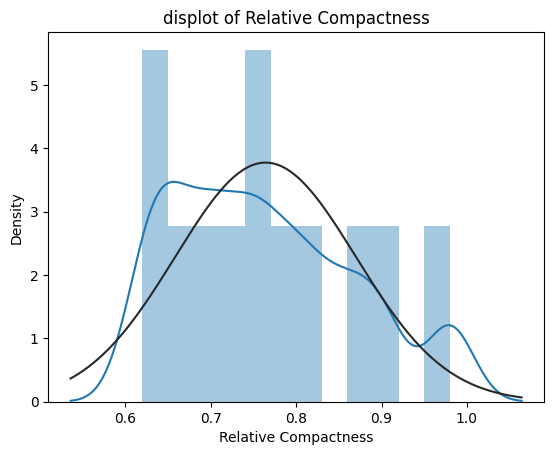

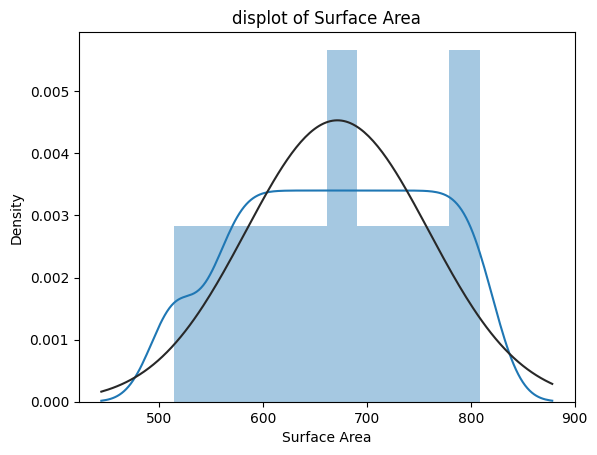

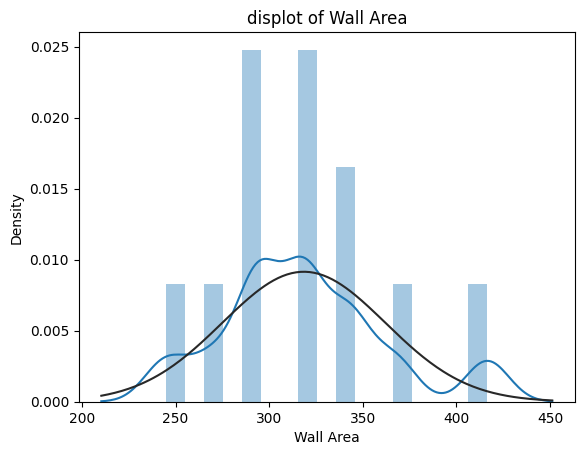

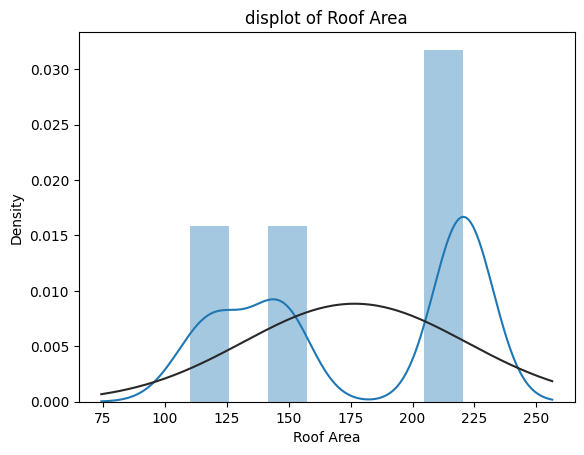

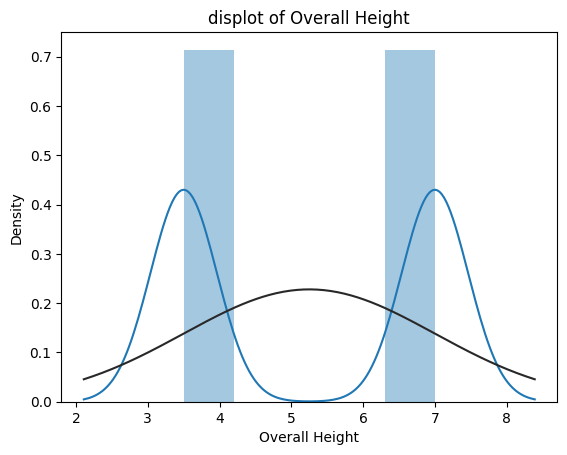

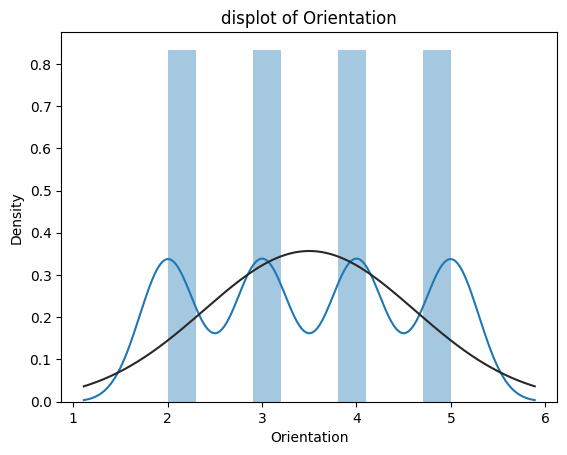

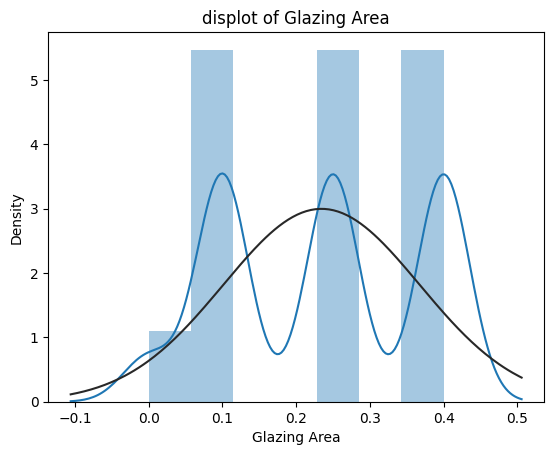

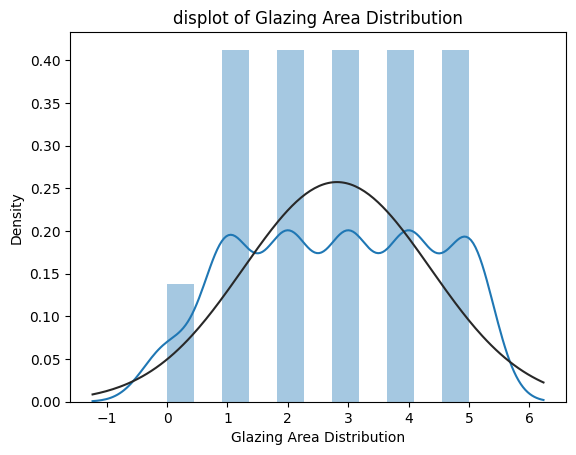

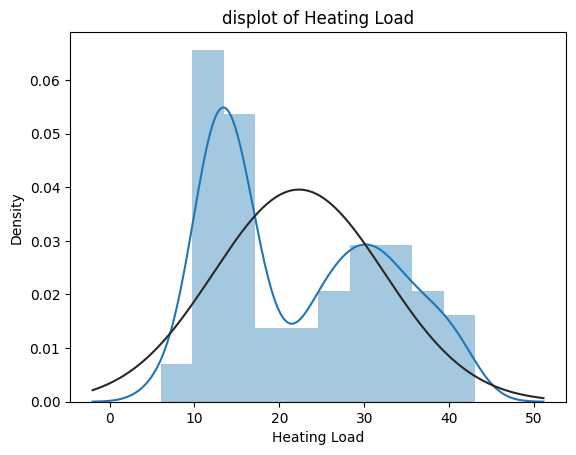

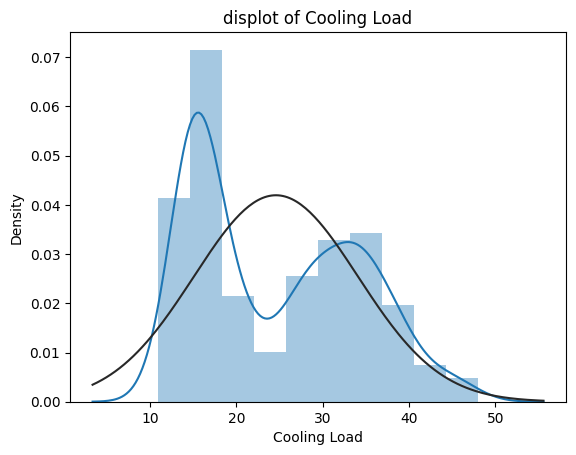

In [5]:
from scipy.stats import norm
for i in df:
    plt.figure()
    sns.distplot(a=df[i],fit=norm)
    plt.title(f"displot of {i}")
    

In [6]:
for i in df:
    skew_value=df[i].skew()
    print(f"skew value of {i}",skew_value)

skew value of Relative Compactness 0.4955125057584307
skew value of Surface Area -0.12513088471591766
skew value of Wall Area 0.5334174896788307
skew value of Roof Area -0.1627639978112447
skew value of Overall Height 0.0
skew value of Orientation 0.0
skew value of Glazing Area -0.0602542286537257
skew value of Glazing Area Distribution -0.0886891754381226
skew value of Heating Load 0.36044888646213086
skew value of Cooling Load 0.39599246696276713


In [7]:
print(f"glazing are dist",len(df[df["Glazing Area Distribution"]==0]))
print(f"galazing area",len(df[df["Glazing Area"]==0]))

glazing are dist 48
galazing area 48


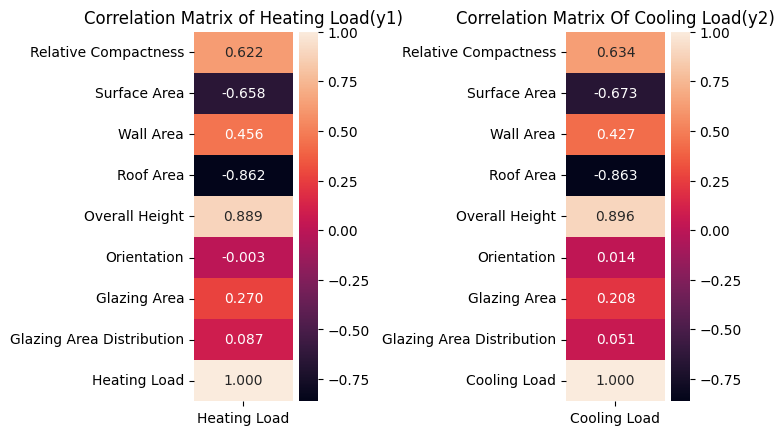

In [8]:
df_y1=df.drop(columns="Cooling Load",axis=1)
df_y2=df.drop(columns="Heating Load",axis=1)
corr_matrix_y1=df_y1.corr()
corr_matrix_y1=corr_matrix_y1["Heating Load"].to_frame()
corr_matrix_y2=df_y2.corr()
corr_matrix_y2=corr_matrix_y2["Cooling Load"].to_frame()
plt.subplot(1,2,1)
sns.heatmap(data=corr_matrix_y1,annot=True,fmt=".3f")
plt.title("Correlation Matrix of Heating Load(y1)")
plt.subplot(1,2,2)
sns.heatmap(data=corr_matrix_y2,annot=True,fmt=".3f")
plt.title("Correlation Matrix Of Cooling Load(y2)")
plt.subplots_adjust(wspace=2,hspace=2)

<Axes: xlabel='Heating Load', ylabel='Cooling Load'>

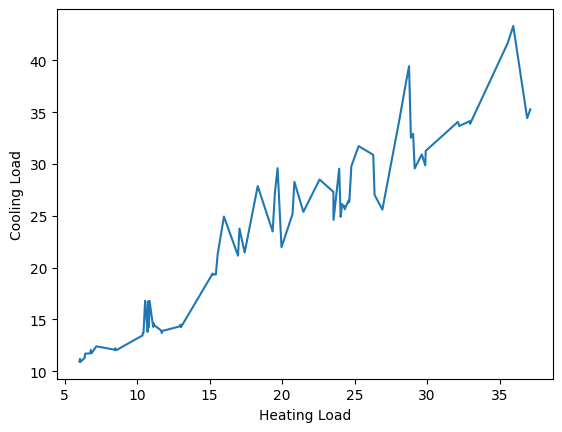

In [9]:
sns.lineplot(x=df["Heating Load"].loc[:100],y=df["Cooling Load"].loc[:100])

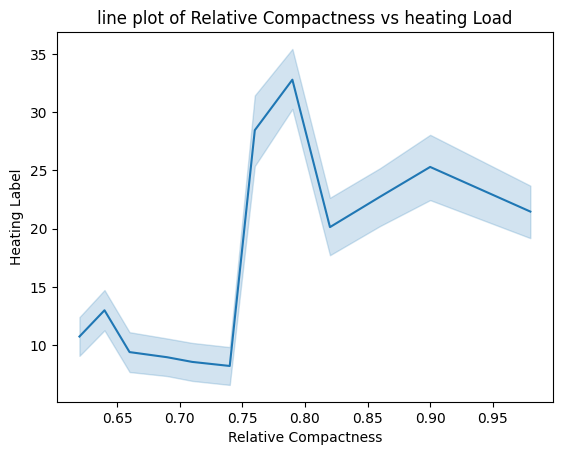

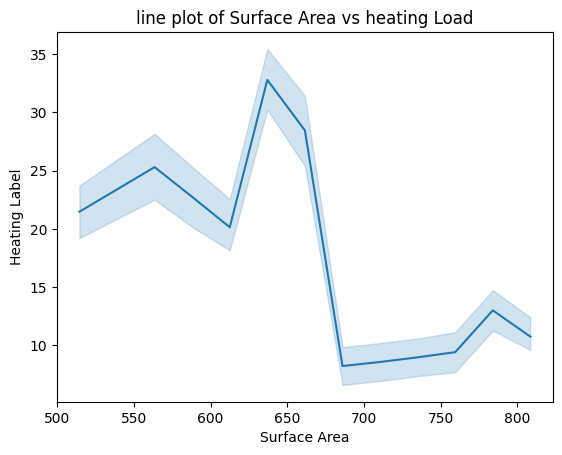

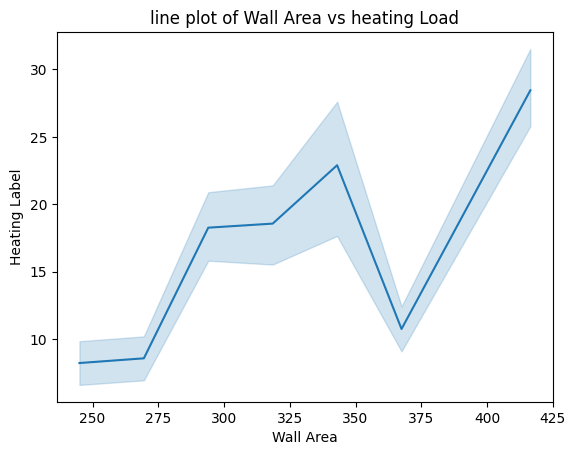

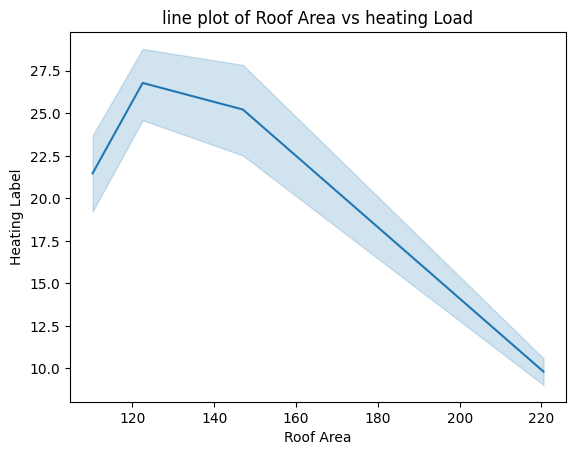

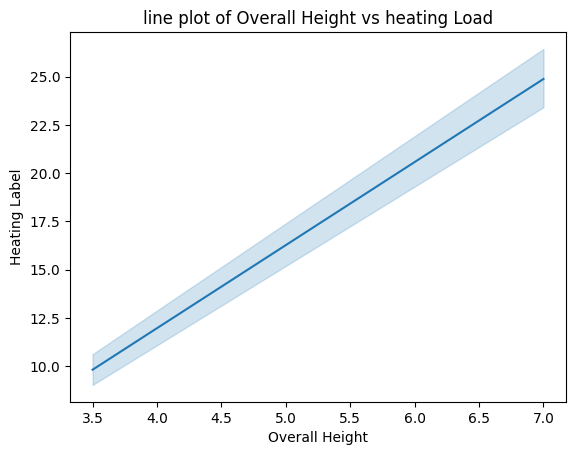

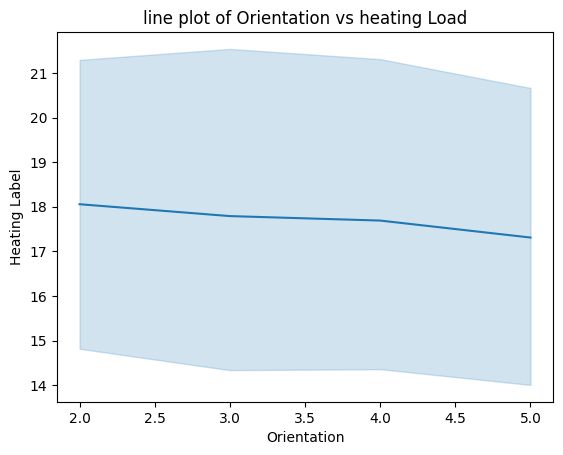

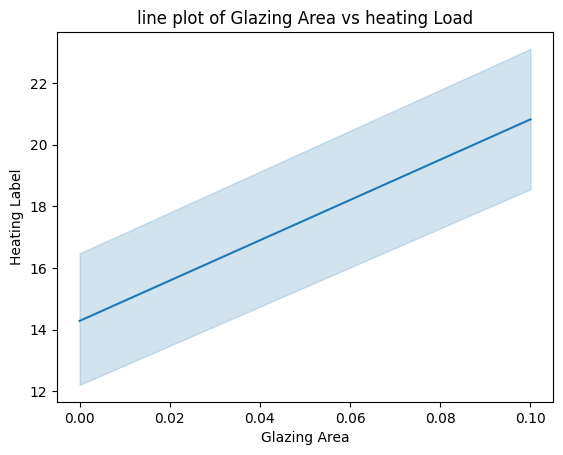

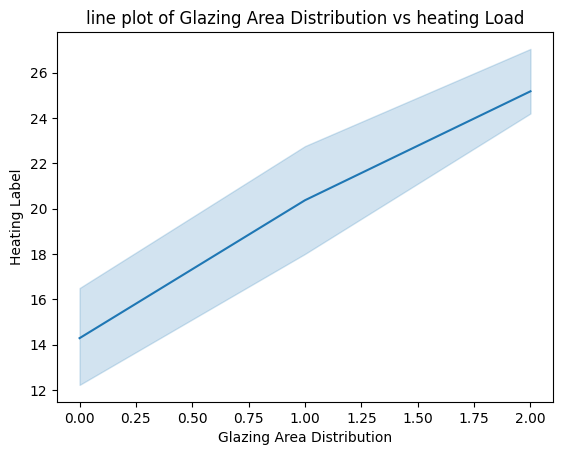

In [10]:
for i in df_y1.drop(columns="Heating Load",axis=1):
    plt.figure()
    sns.lineplot(x=df_y1[i].loc[:100],y=df["Heating Load"].loc[:100])
    plt.xlabel(f"{i}")
    plt.title(f"line plot of {i} vs heating Load")
    plt.ylabel("Heating Label")

In [11]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y1="Heating Load"
y2="Cooling Load"
X=df.drop(columns=[y1,y2])  
y = df[[y1, y2]]
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model=MultiOutputRegressor(XGBRegressor(n_estimators=100,random_state=42))
model.fit(X_train, y_train)

y_pred=model.predict(X_test)


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse_heating=mean_squared_error(y_test[y1],y_pred[:,0])
mse_cooling=mean_squared_error(y_test[y2],y_pred[:,1])

r2_heating=r2_score(y_test[y1],y_pred[:,0])
r2_cooling=r2_score(y_test[y2],y_pred[:,1])

print(f"Heating Load-MSE:{mse_heating:.4f},R2:{r2_heating:.4f}")
print(f"Cooling Load-MSE:{mse_cooling:.4f},R2:{r2_cooling:.4f}")


Heating Load-MSE:0.1659,R2:0.9984
Cooling Load-MSE:0.7367,R2:0.9920


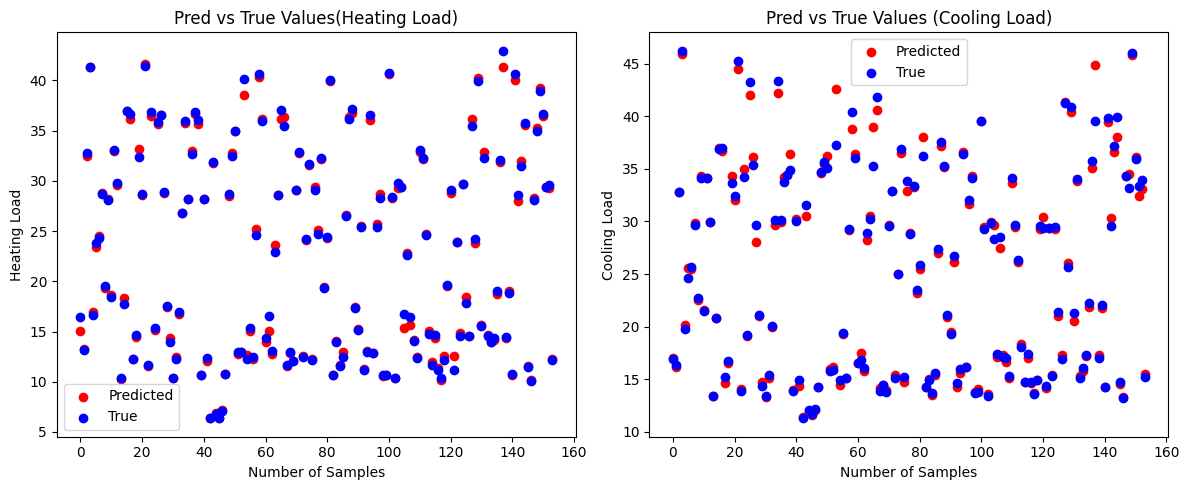

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title("Pred vs True Values(Heating Load)")
plt.scatter(range(len(y_test)),y_pred[:, 0],label="Predicted",color='r')
plt.scatter(range(len(y_test)),y_test.iloc[:,0],label="True",color='b')
plt.xlabel("Number of Samples")
plt.ylabel("Heating Load")
plt.legend()

plt.subplot(1,2,2)
plt.title("Pred vs True Values (Cooling Load)")
plt.scatter(range(len(y_test)),y_pred[:,1],label="Predicted",color='r')
plt.scatter(range(len(y_test)),y_test.iloc[:,1],label="True",color='b')
plt.xlabel("Number of Samples")
plt.ylabel("Cooling Load")
plt.legend()

plt.tight_layout()
plt.show()


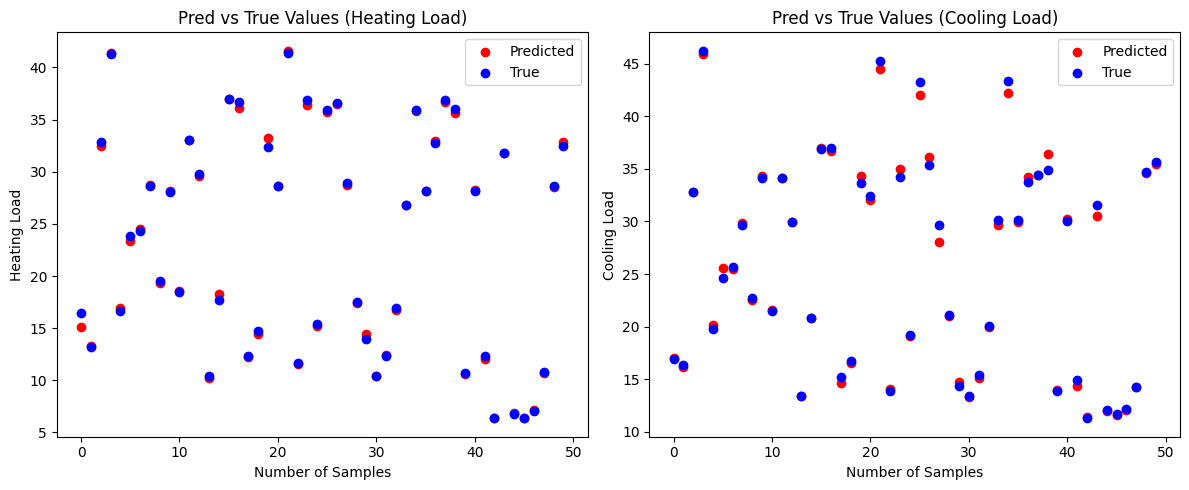

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Pred vs True Values (Heating Load)")
plt.scatter(range(50),y_pred[:50,0],label="Predicted",color='r')
plt.scatter(range(50),y_test.iloc[:50,0],label="True",color='b')
plt.xlabel("Number of Samples")
plt.ylabel("Heating Load")
plt.legend()


plt.subplot(1,2,2)
plt.title("Pred vs True Values (Cooling Load)")
plt.scatter(range(50),y_pred[:50,1],label="Predicted",color='r')
plt.scatter(range(50),y_test.iloc[:50,1],label="True",color='b')
plt.xlabel("Number of Samples")
plt.ylabel("Cooling Load")
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_y1=mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
rmse_y1=np.sqrt(mean_squared_error(y_test.iloc[:,0],y_pred[:,0]))
mape_y1=np.mean(np.abs((y_test.iloc[:,0]-y_pred[:,0])/y_test.iloc[:,0])) * 100
print(f'MAPE_y1: {mape_y1:.2f}%')
print(f"MAE_y1: {mae_y1}")
print(f"RMSE_y1: {rmse_y1}")
print("------")                                  
mae_y2=mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
rmse_y2=np.sqrt(mean_squared_error(y_test.iloc[:,1],y_pred[:,1]))
mape_y2=np.mean(np.abs((y_test.iloc[:,1]-y_pred[:,1])/y_test.iloc[:,1])) * 100
print(f'MAPE_y2 : {mape_y2:.2f}%')
print(f"MAE_y2: {mae_y2}")
print(f"RMSE_y2: {rmse_y2}")

MAPE_y1: 1.27%
MAE_y1: 0.26362161116166544
RMSE_y1: 0.40736265223518786
------
MAPE_y2 : 1.62%
MAE_y2: 0.44862830025809136
RMSE_y2: 0.858288381667682


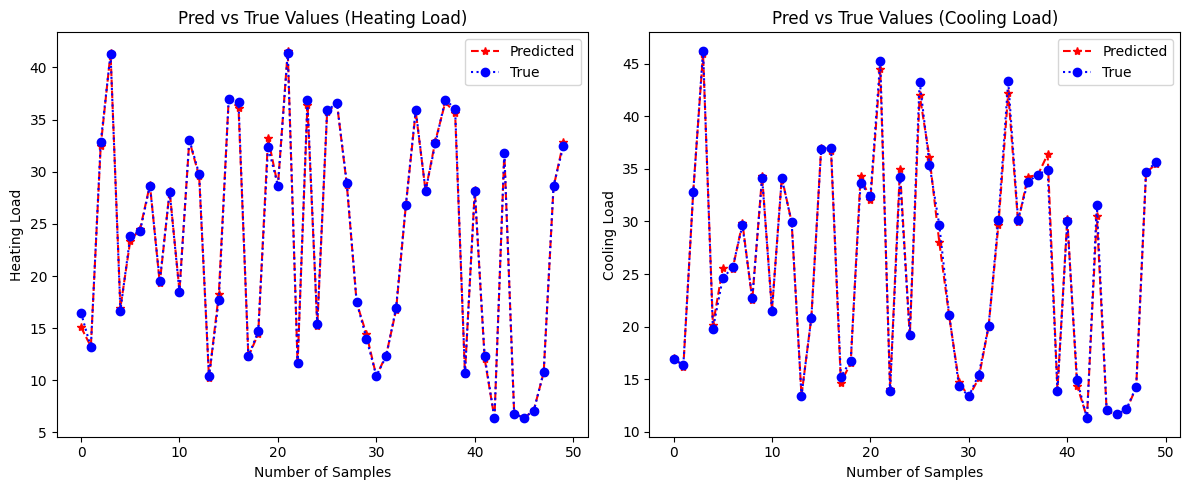

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Pred vs True Values (Heating Load)")
plt.plot(range(50),y_pred[:50,0],label="Predicted",color='r',linestyle="--",marker="*")
plt.plot(range(50),y_test.iloc[:50,0],label="True",color='b',marker="o",linestyle="dotted")
plt.xlabel("Number of Samples")
plt.ylabel("Heating Load")
plt.legend()


plt.subplot(1,2,2)
plt.title("Pred vs True Values (Cooling Load)")
plt.plot(range(50),y_pred[:50,1],label="Predicted",color='r',marker="*",linestyle="--")
plt.plot(range(50),y_test.iloc[:50,1],label="True",color='b',linestyle="dotted",marker="o")
plt.xlabel("Number of Samples")
plt.ylabel("Cooling Load")
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y1="Heating Load"
y2="Cooling Load"
X=df.drop(columns=[y1,y2])  
y = df[[y1, y2]]
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model=MultiOutputRegressor(XGBRegressor(n_estimators=53,random_state=42,learning_rate=.3))
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse_heating=mean_squared_error(y_test[y1],y_pred[:,0])
mse_cooling=mean_squared_error(y_test[y2],y_pred[:,1])

r2_heating=r2_score(y_test[y1],y_pred[:,0])
r2_cooling=r2_score(y_test[y2],y_pred[:,1])

print(f"Heating Load-MSE:{mse_heating:.4f},R2:{r2_heating:.4f}")
print(f"Cooling Load-MSE:{mse_cooling:.4f},R2:{r2_cooling:.4f}")

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_y1=mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
rmse_y1=np.sqrt(mean_squared_error(y_test.iloc[:,0],y_pred[:,0]))
mape_y1=np.mean(np.abs((y_test.iloc[:,0]-y_pred[:,0])/y_test.iloc[:,0])) * 100
print(f'MAPE_y1: {mape_y1:.2f}%')
print(f"MAE_y1: {mae_y1}")
print(f"RMSE_y1: {rmse_y1}")
print("------")                                  
mae_y2=mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
rmse_y2=np.sqrt(mean_squared_error(y_test.iloc[:,1],y_pred[:,1]))
mape_y2=np.mean(np.abs((y_test.iloc[:,1]-y_pred[:,1])/y_test.iloc[:,1])) * 100
print(f'MAPE_y2 : {mape_y2:.2f}%')
print(f"MAE_y2: {mae_y2}")
print(f"RMSE_y2: {rmse_y2}")

Heating Load-MSE:0.1696,R2:0.9984
Cooling Load-MSE:0.7766,R2:0.9916
MAPE_y1: 1.30%
MAE_y1: 0.2783179503601866
RMSE_y1: 0.4118754575023566
------
MAPE_y2 : 1.74%
MAE_y2: 0.4914850259756112
RMSE_y2: 0.8812759658639486


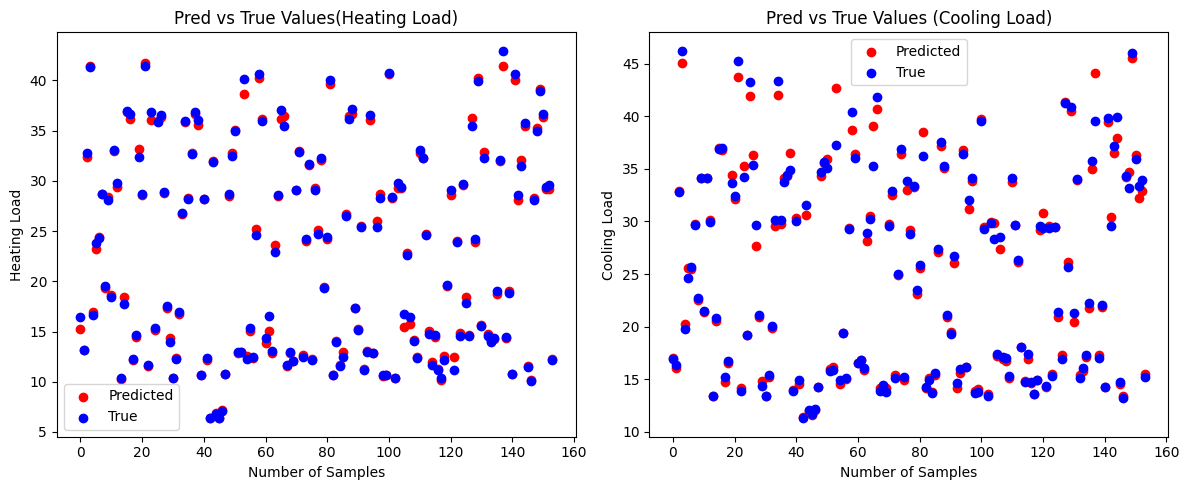

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title("Pred vs True Values(Heating Load)")
plt.scatter(range(len(y_test)),y_pred[:, 0],label="Predicted",color='r')
plt.scatter(range(len(y_test)),y_test.iloc[:,0],label="True",color='b')
plt.xlabel("Number of Samples")
plt.ylabel("Heating Load")
plt.legend()

plt.subplot(1,2,2)
plt.title("Pred vs True Values (Cooling Load)")
plt.scatter(range(len(y_test)),y_pred[:,1],label="Predicted",color='r')
plt.scatter(range(len(y_test)),y_test.iloc[:,1],label="True",color='b')
plt.xlabel("Number of Samples")
plt.ylabel("Cooling Load")
plt.legend()

plt.tight_layout()
plt.show()


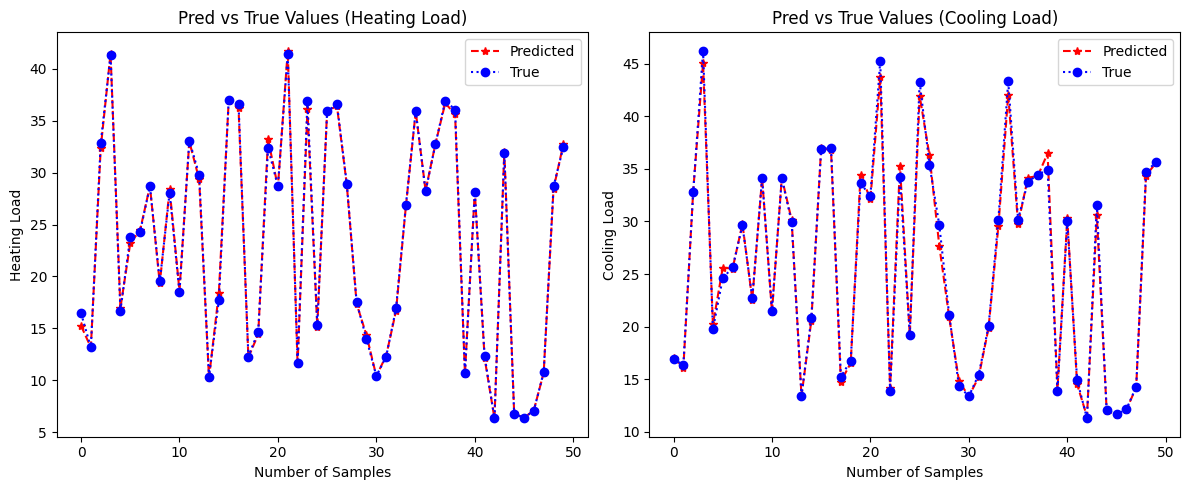

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Pred vs True Values (Heating Load)")
plt.plot(range(50),y_pred[:50,0],label="Predicted",color='r',linestyle="--",marker="*")
plt.plot(range(50),y_test.iloc[:50,0],label="True",color='b',marker="o",linestyle="dotted")
plt.xlabel("Number of Samples")
plt.ylabel("Heating Load")
plt.legend()


plt.subplot(1,2,2)
plt.title("Pred vs True Values (Cooling Load)")
plt.plot(range(50),y_pred[:50,1],label="Predicted",color='r',marker="*",linestyle="--")
plt.plot(range(50),y_test.iloc[:50,1],label="True",color='b',linestyle="dotted",marker="o")
plt.xlabel("Number of Samples")
plt.ylabel("Cooling Load")
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y1="Heating Load"
y2="Cooling Load"
X=df.drop(columns=[y1,y2])  
y=df[[y1, y2]]
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
y=np.log1p(y)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model=MultiOutputRegressor(XGBRegressor(n_estimators=60,random_state=42))
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
mae_y1=mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
rmse_y1=np.sqrt(mean_squared_error(y_test.iloc[:,0],y_pred[:,0]))
mape_y1=np.mean(np.abs((y_test.iloc[:,0]-y_pred[:,0])/y_test.iloc[:,0])) * 100
print(f'MAPE_y1: {mape_y1:.2f}%')
print(f"MAE_y1: {mae_y1}")
print(f"RMSE_y1: {rmse_y1}")
print("------")                                  
mae_y2=mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
rmse_y2=np.sqrt(mean_squared_error(y_test.iloc[:,1],y_pred[:,1]))
mape_y2=np.mean(np.abs((y_test.iloc[:,1]-y_pred[:,1])/y_test.iloc[:,1])) * 100
print(f'MAPE_y2 : {mape_y2:.2f}%')
print(f"MAE_y2: {mae_y2}")
print(f"RMSE_y2: {rmse_y2}")

print("----")

mse_heating=mean_squared_error(y_test[y1],y_pred[:,0])
mse_cooling=mean_squared_error(y_test[y2],y_pred[:,1])

r2_heating=r2_score(y_test[y1],y_pred[:,0])
r2_cooling=r2_score(y_test[y2],y_pred[:,1])

print(f"Heating Load-MSE:{mse_heating:.4f},R2:{r2_heating:.4f}")
print(f"Cooling Load-MSE:{mse_cooling:.4f},R2:{r2_cooling:.4f}")

MAPE_y1: 0.41%
MAE_y1: 0.012081505165964774
RMSE_y1: 0.019187477834338464
------
MAPE_y2 : 0.53%
MAE_y2: 0.017162409800917256
RMSE_y2: 0.02452960260472573
----
Heating Load-MSE:0.0004,R2:0.9983
Cooling Load-MSE:0.0006,R2:0.9959


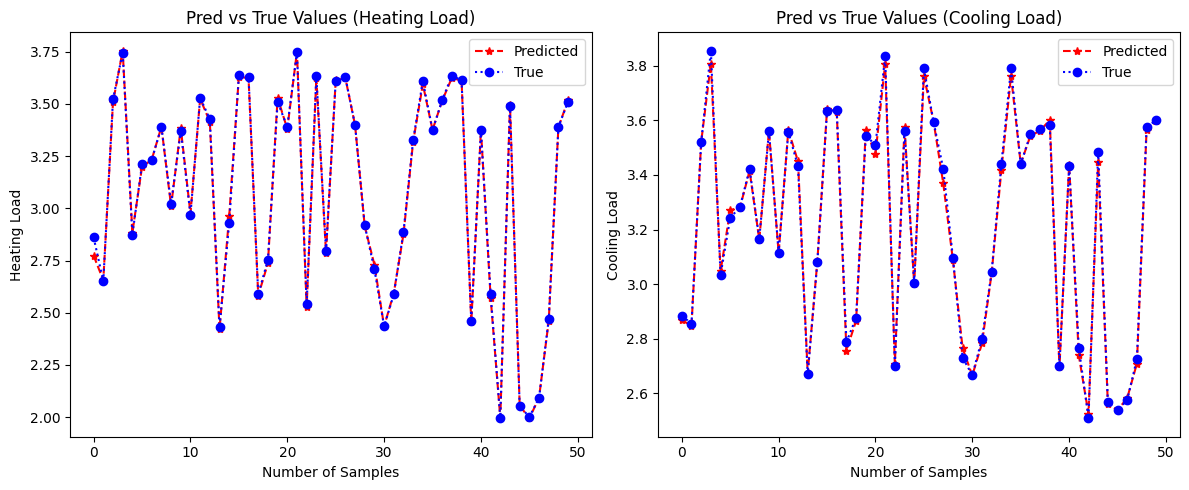

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Pred vs True Values (Heating Load)")
plt.plot(range(50),y_pred[:50,0],label="Predicted",color='r',linestyle="--",marker="*")
plt.plot(range(50),y_test.iloc[:50,0],label="True",color='b',marker="o",linestyle="dotted")
plt.xlabel("Number of Samples")
plt.ylabel("Heating Load")
plt.legend()


plt.subplot(1,2,2)
plt.title("Pred vs True Values (Cooling Load)")
plt.plot(range(50),y_pred[:50,1],label="Predicted",color='r',marker="*",linestyle="--")
plt.plot(range(50),y_test.iloc[:50,1],label="True",color='b',linestyle="dotted",marker="o")
plt.xlabel("Number of Samples")
plt.ylabel("Cooling Load")
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
y_test_exp=np.expm1(y_test)
y_pred_exp=np.expm1(y_pred)

residuals=y_test_exp-y_pred_exp

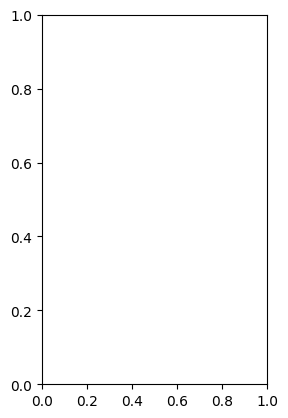

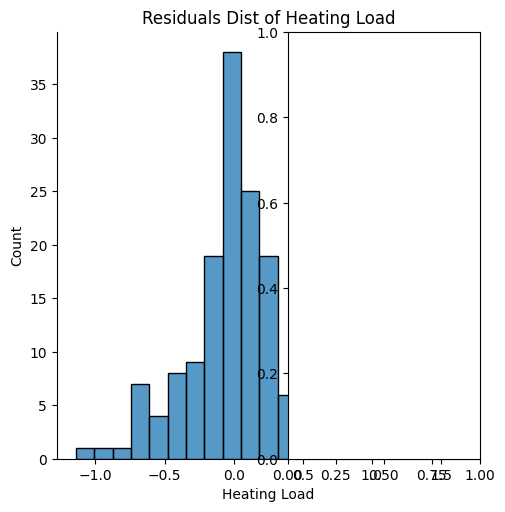

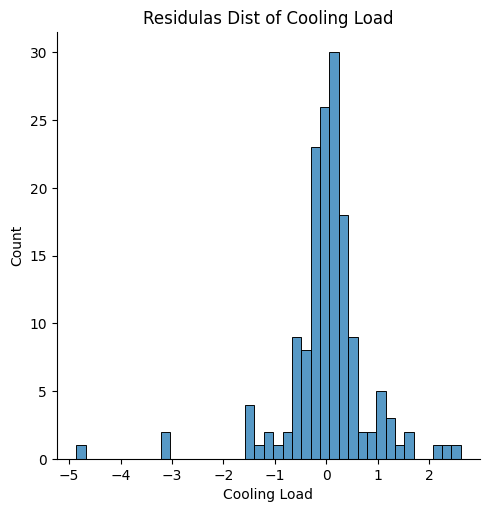

In [24]:

plt.subplot(1,2,1)
sns.displot(residuals.iloc[:,0])
plt.title("Residuals Dist of Heating Load")
plt.subplot(1,2,2)
sns.displot(residuals.iloc[:,1])
plt.title("Residulas Dist of Cooling Load")
plt.show()

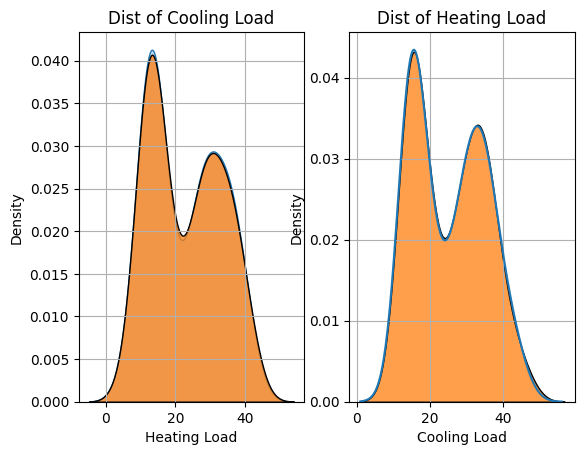

In [25]:
plt.subplot(1,2,1)
sns.kdeplot(data=y_pred_exp[:,0],shade=True)
sns.kdeplot(data=y_test_exp.iloc[:,0],multiple="stack",fill=True,shade=True)
plt.title("Dist of Cooling Load")
plt.grid()

plt.subplot(1,2,2)
sns.kdeplot(data=y_pred_exp[:,1])
sns.kdeplot(data=y_test_exp.iloc[:,1],multiple="stack")
plt.title("Dist of Heating Load")
plt.grid()

In [26]:
print(f'MAPE_y1: {mape_y1:.2f}%')
print(f"MAE_y1: {mae_y1}")
print(f"RMSE_y1: {rmse_y1}")
print("------")                                  
mae_y2=mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
rmse_y2=np.sqrt(mean_squared_error(y_test.iloc[:,1],y_pred[:,1]))
mape_y2=np.mean(np.abs((y_test.iloc[:,1]-y_pred[:,1])/y_test.iloc[:,1])) * 100
print(f'MAPE_y2 : {mape_y2:.2f}%')
print(f"MAE_y2: {mae_y2}")
print(f"RMSE_y2: {rmse_y2}")

print("----")

mse_heating=mean_squared_error(y_test[y1],y_pred[:,0])
mse_cooling=mean_squared_error(y_test[y2],y_pred[:,1])

r2_heating=r2_score(y_test[y1],y_pred[:,0])
r2_cooling=r2_score(y_test[y2],y_pred[:,1])

print(f"Heating Load-MSE:{mse_heating:.4f},R2:{r2_heating:.4f}")
print(f"Cooling Load-MSE:{mse_cooling:.4f},R2:{r2_cooling:.4f}")

MAPE_y1: 0.41%
MAE_y1: 0.012081505165964774
RMSE_y1: 0.019187477834338464
------
MAPE_y2 : 0.53%
MAE_y2: 0.017162409800917256
RMSE_y2: 0.02452960260472573
----
Heating Load-MSE:0.0004,R2:0.9983
Cooling Load-MSE:0.0006,R2:0.9959
